# Color palette from image
### using PIL and extcolors, result rendered with Matplotlib

In [4]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.text as mptext

from PIL import Image
import extcolors
from colormap import rgb2hex
from colormap import rgb2hls

The following code opens an image and extracts the colors from it using PIL and extcolors.  
It then sets up a Matplotlib figure to display the most prominent colors in a pleasant layout.

In [5]:
def image_to_palette(image_path:str):
    
    # Open the image and resize for easier handling
    image = Image.open(image_path)
    new_patch_width = 500
    new_patch_height = int((float(image.size[1]) * float(new_patch_width/float(image.size[0])) ))
    image = image.resize((new_patch_width,new_patch_height), Image.LANCZOS)
    
    # Extract colors
    colors_rgb = extcolors.extract_from_image(image, tolerance = 17, limit = 21)[0]
    no_of_colors = len(colors_rgb)
        
    # Format colors to hexadecimal
    colors_hex = list(range(no_of_colors))
    colors_saturation = list(range(no_of_colors))
    colors_lightness = list(range(no_of_colors))
    for i, color_rgb in enumerate(colors_rgb):
        colors_hex[i] = rgb2hex(color_rgb[0][0], color_rgb[0][1], color_rgb[0][2])

    # Generate list of colors by saturation and lightness
    for i, color_rgb in enumerate(colors_rgb):
        colors_saturation[i] = rgb2hls(color_rgb[0][0], color_rgb[0][1], color_rgb[0][2], False)[2]
        colors_lightness[i] = rgb2hls(color_rgb[0][0], color_rgb[0][1], color_rgb[0][2], False)[1]
    # Get the top 5 vibrant, dark and light colors
    sorted_sat = sorted(colors_saturation)
    sorted_light = sorted(colors_lightness)
    vibrant_colors = sorted_sat[-5:]
    light_colors = sorted_light[-5:]
    dark_colors = sorted_light[0:5]

    # Setting up the figure
    background_color = "#808080"
    fig_ = plt.figure(figsize=(8,4), dpi=200, facecolor=background_color)
    # Main colors
    subplot_top_colors = fig_.add_subplot()
    subplot_top_colors.set_position([0, 0, 1/6, 1])
    # Image
    subplot_image = fig_.add_subplot()
    subplot_image.set_position([1/6, 0, 0.5, 1])
    image = mpimg.imread(image_path)
    subplot_image.imshow(image)
    # Vibrant colors
    subplot_vibrant = fig_.add_subplot()
    subplot_vibrant.set_position([2/3, 2/3, 1/3, 1/3])
    # Dark colors
    subplot_dark = fig_.add_subplot()
    subplot_dark.set_position([2/3, 1/3, 1/3, 1/3])
    # Light colors
    subplot_light = fig_.add_subplot()
    subplot_light.set_position([2/3, 0, 1/3, 1/3])

    # Fix aspect of vibrant, dark and light axes
    subplot_vibrant.set_aspect(1)
    subplot_dark.set_aspect(1)
    subplot_light.set_aspect(1)
    subplot_vibrant.set_box_aspect(0.5)
    subplot_dark.set_box_aspect(0.5)
    subplot_light.set_box_aspect(0.5)

    # Only render the content of the axes
    subplot_top_colors.axis("off")
    subplot_image.axis("off")
    subplot_vibrant.axis("off")
    subplot_dark.axis("off")
    subplot_light.axis("off")
    
    
    # Adding most used colors to the figure
    no_of_colors_to_display = 7
    aspect = 1/3 # this is so that elements of the subplot are properly scaled
    patch_width = 0.83
    patch_height = 1/no_of_colors_to_display - 0.03
    padding = 0.1
    hexcode_yoffset = -0.052
    hexcode_fontsize = "xx-small"
    hexcode_fontfamily = "monospace"    
    x,y = 0,1-(patch_height - 2*padding*aspect)
    for color in colors_hex[:no_of_colors_to_display]:
        color_patch = patches.FancyBboxPatch((x+padding,y-padding*aspect), patch_width-2*padding, patch_height-2*padding*aspect, f"Round,pad={padding},rounding_size=0.03", mutation_aspect=aspect, facecolor=color, edgecolor="None")
        hexcode = mptext.Text(x=x, y=y-padding*aspect+hexcode_yoffset, text=color, fontsize=hexcode_fontsize, fontfamily=hexcode_fontfamily)
        subplot_top_colors.add_patch(color_patch)
        subplot_top_colors.add_artist(hexcode)
        y -= 1/no_of_colors_to_display 
    
    # Adding vibrant, dark and light colors to the figure
    x,y = -0.15,0.5
    # Titles
    title_xoffset = -0.2
    title_yoffset = 0.3
    title_fontsize = "small"
    title_fontfamily = "serif"
    title_vibrant = mptext.Text(x+title_xoffset, y+title_yoffset, "vibrant colors", fontsize=title_fontsize, fontfamily=title_fontfamily)
    title_dark =    mptext.Text(x+title_xoffset, y+title_yoffset, "dark colors", fontsize=title_fontsize, fontfamily=title_fontfamily)
    title_light =   mptext.Text(x+title_xoffset, y+title_yoffset, "light colors", fontsize=title_fontsize, fontfamily=title_fontfamily)
    subplot_vibrant.add_artist(title_vibrant)
    subplot_dark.add_artist(title_dark)
    subplot_light.add_artist(title_light)
    # Color patches
    patch_spacing = 0.35
    hexcode_xoffset = -0.14
    hexcode_yoffset = -0.27
    hexcode_fontsize = "xx-small"
    hexcode_fontfamily = "monospace"
    circle_radius = 0.2
    for i in range(5):
        color_patch_vibrant = patches.Circle((x,y), circle_radius, facecolor=colors_hex[colors_saturation.index(vibrant_colors[i])])
        hexcode_vibrant = mptext.Text(x+hexcode_xoffset, y+hexcode_yoffset, colors_hex[colors_saturation.index(vibrant_colors[i])], fontsize=hexcode_fontsize, fontfamily=hexcode_fontfamily)
        subplot_vibrant.add_patch(color_patch_vibrant)
        subplot_vibrant.add_artist(hexcode_vibrant)

        color_patch_dark = patches.Circle((x,y), circle_radius, facecolor=colors_hex[colors_lightness.index(dark_colors[i])])
        hexcode_dark = mptext.Text(x+hexcode_xoffset, y+hexcode_yoffset, colors_hex[colors_lightness.index(dark_colors[i])], fontsize=hexcode_fontsize, fontfamily=hexcode_fontfamily)
        subplot_dark.add_patch(color_patch_dark)
        subplot_dark.add_artist(hexcode_dark)

        color_patch_light = patches.Circle((x,y), circle_radius, facecolor=colors_hex[colors_lightness.index(light_colors[i])])
        hexcode_light = mptext.Text(x+hexcode_xoffset, y+hexcode_yoffset, colors_hex[colors_lightness.index(light_colors[i])], fontsize=hexcode_fontsize, fontfamily=hexcode_fontfamily)
        subplot_light.add_patch(color_patch_light)
        subplot_light.add_artist(hexcode_light)
        
        x += patch_spacing
    
    plt.show()

Try it out with different images:

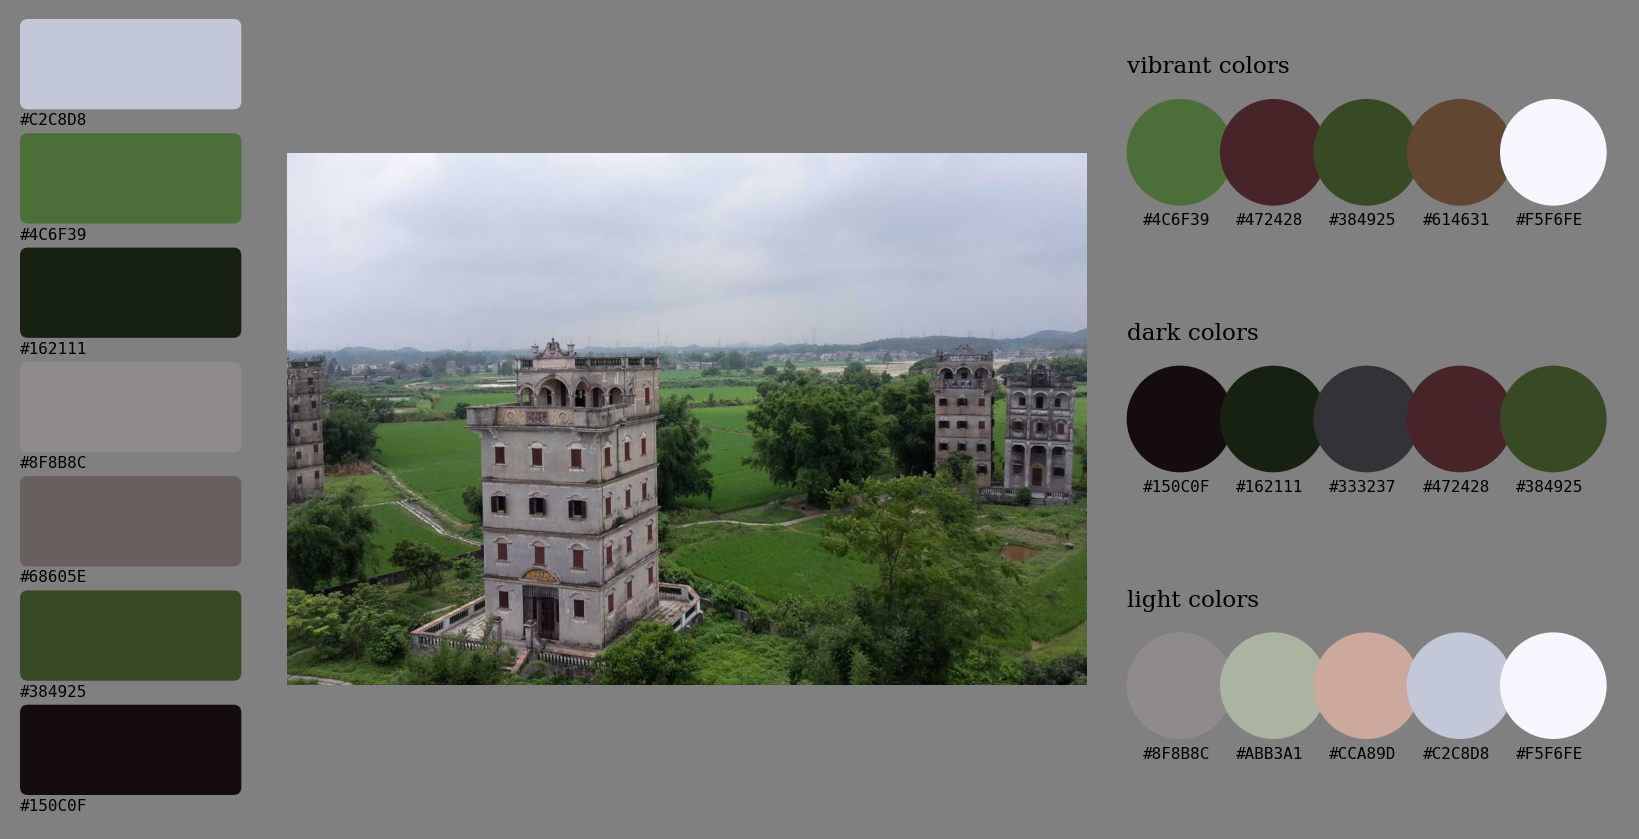

In [6]:

image_1 = "./resources/cafe.jpg"
image_2 = "./resources/manedwolf.jpg"
image_3 = "./resources/redblue.jpg"
image_4 = "./resources/garden.jpg"
image_5 = "./resources/plasticflamingoes.jpg"

image_to_palette(image_1)